In [13]:
7.75*100000 / 1000 / 60

12.916666666666666

In [12]:
3.15*100000 / 1000 / 60

5.25

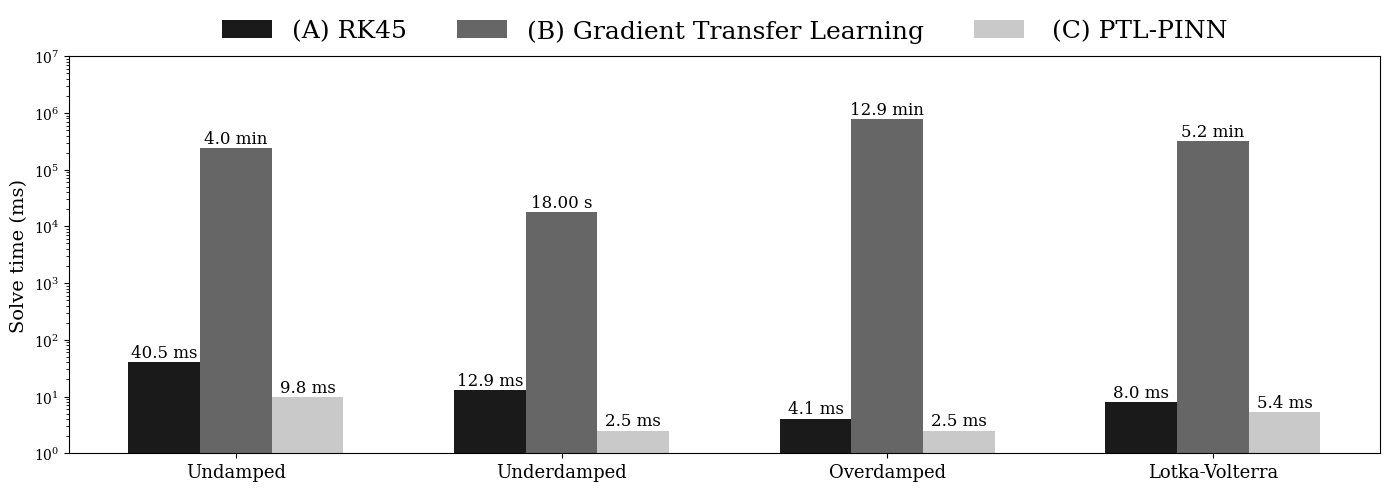

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- Data (convert everything to milliseconds for plotting) ---
labels = ["Undamped", "Underdamped", "Overdamped", "Lotka-Volterra"]

# RK45, Gradient Transfer Learning, PTL-PINN-invert (all in ms)
rk45_ms   = np.array([40.5,     12.9,         4.1, 8.01])          # ms
gtl_ms    = np.array([23.70*10000, 1.80*10000, 7.75*100000, 3.15*100000])  # s, s, min  -> ms
ptl_ms    = np.array([9.8,       2.5,         2.5, 5.36])          # ms

series = [rk45_ms, gtl_ms, ptl_ms]
series_labels = ["(A) RK45", "(B) Gradient Transfer Learning", " (C) PTL-PINN"]

# --- Plot settings ---
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",
    "text.usetex": False,
})

x = np.arange(len(labels))
width = 0.22

fig, ax = plt.subplots(figsize=(14, 5))

# Grayscale bars (close to your figure)
colors = ["#1a1a1a", "#666666", "#c9c9c9"]

bars = []
for i, y in enumerate(series):
    bars.append(ax.bar(x + (i-1)*width, y, width=width, label=series_labels[i], edgecolor="none", color=colors[i]))

# Log scale in milliseconds
ax.set_yscale("log")
ax.set_ylabel("Solve time (ms)", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=13)

# Optional: extend limits to resemble your axis span
ax.set_ylim(1, 1e7)

# Legend at the very top, centered
legend = ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, fontsize=18)

# Helper to format unit labels exactly like your figure
def fmt_time_ms(v_ms):
    if v_ms >= 60_000:          # minutes
        return f"{v_ms/60_000:.1f} min"
    elif v_ms >= 1000:          # seconds
        return f"{v_ms/1000:.2f} s"
    else:                       # milliseconds
        # keep one decimal if needed
        return f"{v_ms:.1f} ms" if (v_ms*10) % 10 else f"{int(v_ms)} ms"

# Add value labels above bars
for group in bars:
    for rect in group:
        y = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2,
            y * 1.05,                      # a bit above the bar (works with log scale)
            fmt_time_ms(y),
            ha="center", va="bottom",
            fontsize=12
        )

# Tight layout to avoid clipping
fig.tight_layout()
plt.show()